# Project: Insurance Fraud Detection (DS)
---------------------------------------------

 Data Science Using Python - University of Connecticut**

*This dataset comes from the 2023 NESS Statathon (Theme 1). Here is a link to where the live competition is being hosted - feel free to join!*
* https://www.kaggle.com/competitions/2023-travelers-ness-statathon/overview

**Challenge:** You work for Travelers Insurance Company's fraud detection department as a modeler. Your colleagues, who are not familiar with statistics, would like you to create a predictive model based on historical claim data. Your team is concerned about the fraud detection accuracy as well as the key drivers that cause fraudulence.

For this case competition, your group is tasked with identifying first-party physical damage fraudulence and explaining the indicators of fraudulent claims.
  * Make sure you use the 'weighted' F1 score - you can just print this using the classification report (bottom right corner).
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Dataset Description
All first-party physical damage claims will be filtered by claim handlers and some of them will be referred to the fraud detection team. Your data is a sample of these referred claims from 2015 to 2016.

As a simplification, you are just going to work with the train dataset (linked below). This is because it has the answers! All teams will use the same random_seed to split the data into train and test - Dave will do this part for you. You may not delete rows in the test partition, use `transform()` to update rows in test partition, you can do almost anything you want on the train partition. If there is data leakage, you automatically go into last place (more on that later.)

Your work is to build a model on the training data and apply your model to predict the fraud indicator for each claim in the test data.

**Variable Descriptions**
* claim_number - Claim ID **(cannot be used in model)**
* age_of_driver - Age of driver
* gender - Gender of driver
* marital_status - Marital status of driver
* safty_rating - Safety rating index of driver
* annual_income - Annual income of driver
* high_education_ind - Driver’s high education index
* address_change_ind - Whether or not the driver changed living address in past 1 year
* living_status - Driver’s living status, own or rent
* zip_code - Driver’s living address zipcode
* claim_date - Date of first notice of claim
* claim_day_of_week - Day of week of first notice of claim
* accident_site - Accident location, highway, parking lot or local
* past_num_of_claims - Number of claims the driver reported in past 5 years
* witness_present_ind - Witness indicator of the claim
* liab_prct - Liability percentage of the claim
* channel - The channel of purchasing policy
* policy_report_filed_ind - Policy report filed indicator
* claim_est_payout - Estimated claim payout
* age_of_vehicle - Age of first party vehicle
* vehicle_category - Category of first party vehicle
* vehicle_price - Price of first party vehicle
* vehicle_color - Color of first party vehicle
* vehicle_weight - Weight of first party vehicle
* fraud - Fraud indicator (0=no, 1=yes). **This is the response variable.**

The train and test files have also been made available to students for modeling on HuskyCT.

In [ ]:
!gdown 1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq

Downloading...
From: https://drive.google.com/uc?id=1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq
To: /content/train_2023.csv
100% 2.62M/2.62M [00:00<00:00, 114MB/s]


##Read Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# for some basic operations
import numpy as np
import pandas as pd
#for visualisations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('train_2023.csv')
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,0,50,F,1.0,66,39117,1,0,Own,50051,...,18,Broker,0,5464.903723,3.0,Large,16786.28845,blue,34183.436390,0
1,1,47,M,1.0,78,38498,1,0,Own,50012,...,81,Broker,0,5448.155974,4.0,Large,20793.29881,black,14528.379730,0
2,2,28,M,0.0,76,33343,0,1,Rent,20158,...,94,Broker,1,1858.971699,4.0,Compact,6729.47649,blue,7182.832636,0
3,3,36,M,1.0,56,35832,1,0,Own,50054,...,95,Phone,0,4040.932844,5.0,Compact,24914.26785,gray,47891.788790,0
4,4,60,F,1.0,79,40948,1,1,Rent,80010,...,53,Phone,1,4876.606138,6.0,Medium,17392.41997,black,7546.494014,0


In [ ]:
# hint: do you have imbalanced data?
df['fraud'].value_counts() # yes you do!

0    16062
1     2938
Name: fraud, dtype: int64

##Data Splitting

In [ ]:
# split the data (don't change this!)

X = df.drop(['claim_number', 'fraud'],axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# check the shapes
print(df.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19000, 25)
(15200, 23) (15200,)
(3800, 23) (3800,)


Please use nice big, descriptive subheaders so that it is easy to grade! Thank you!

# Exploratory Data Analysis

Adding the Y variable to X to perform EDA

In [ ]:
train_data = X_train.copy()
train_data['fraud'] = y_train

In [ ]:
train_data.dtypes

age_of_driver                int64
gender                      object
marital_status             float64
safty_rating                 int64
annual_income                int64
high_education_ind           int64
address_change_ind           int64
living_status               object
zip_code                     int64
claim_date                  object
claim_day_of_week           object
accident_site               object
past_num_of_claims           int64
witness_present_ind        float64
liab_prct                    int64
channel                     object
policy_report_filed_ind      int64
claim_est_payout           float64
age_of_vehicle             float64
vehicle_category            object
vehicle_price              float64
vehicle_color               object
vehicle_weight             float64
fraud                        int64
dtype: object

## Plots

###Plot 1: Fraud Distribution by Witness Presence


The generated plot provides a visual representation of the distribution of fraud cases based on Witness Presence. The y-axis represents the count of fraud cases, while the x-axis displays the whether there is any Witness Presence.The count of fraud cases is displayed on top of each bar.The height of each bar represents the count of fraud cases for a specific category of the 'witness_present_ind' variable. In this case, the bar corresponding to the category without a witness is taller, indicating a higher count of fraud cases compared to the category with a witness (witness_present_ind = 1).

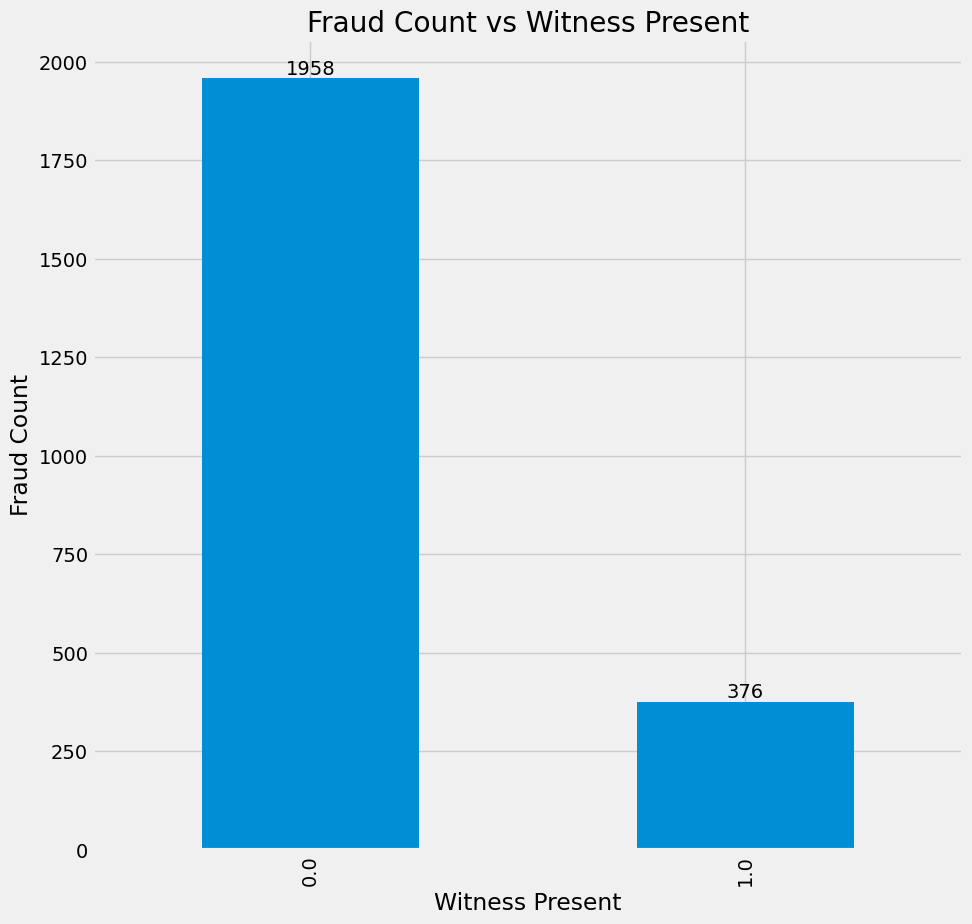

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10, 10))
ax = train_data[train_data['fraud'] == 1].groupby('witness_present_ind').size().plot.bar(ylim=0)
ax.set_ylabel('Fraud Count')
ax.set_xlabel('Witness Present')
plt.title("Fraud Count vs Witness Present")

# Display count on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()



###Plot 2: Distribution of Age of Drivers for Fraudulent Claims

The graph displays the distribution of the age of drivers for both fraudulent  and non fraudulent claims, revealing some noteworthy observations. The data consists of 2,347 instances of fraudulent claims, with an average age of approximately 41.82 years.The minimum age recorded for fraudulent claims is 19, while the maximum age reaches 229. The median age of drivers in fraudulent claims is 42, suggesting that half of the drivers involved in fraudulent claims are younger than 42 and the other half are older. The 25th percentile (Q1) falls at an age of 35, meaning that 25% of the drivers in fraudulent claims are 35 years old or younger. The 75th percentile (Q3) lies at 47.5, indicating that 75% of the drivers in fraudulent claims have an age of 47.5 or below.

We see a outlier of age >100 in the datset.We will have to handle this.

         count       mean        std   min   25%   50%   75%    max
fraud                                                              
0      12853.0  43.898467  12.286181  18.0  35.0  43.0  52.0  278.0
1       2347.0  41.818918  10.969578  19.0  35.0  42.0  47.5  229.0


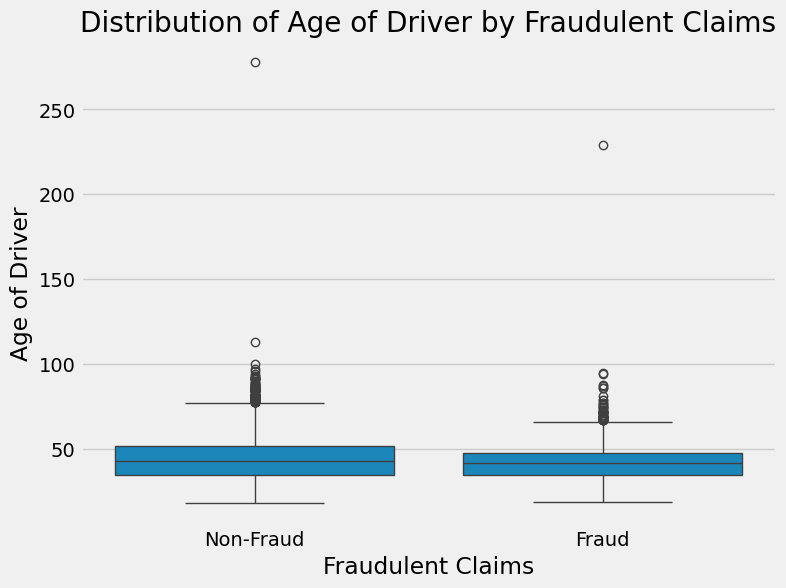

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fraud', y='age_of_driver', data=train_data)
plt.xlabel('Fraudulent Claims')
plt.ylabel('Age of Driver')
plt.title('Distribution of Age of Driver by Fraudulent Claims')

# Calculate summary statistics
summary_stats = train_data.groupby('fraud')['age_of_driver'].describe()
print(summary_stats)

plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


### Plot 3 : Correlation Plot
Observations :
annual_income, age_of_driver seem to be related to each other, which makes sense because as you get older, you are more likely to get more education and more job experience, and hence a higher salary. A higher salary increases the possibility of owning a property.
past_num_of_claims is positively correlated with policy_report_file_ind and fraud.

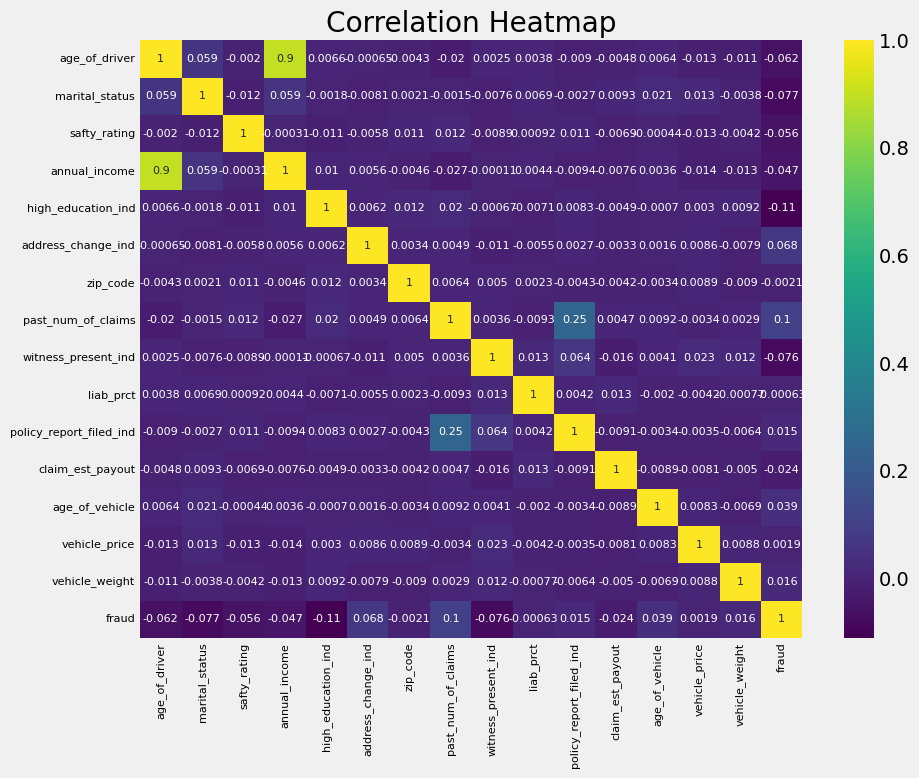

In [ ]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(train_data.corr(method='pearson'), annot=True,cmap='viridis',annot_kws={"fontsize": 8})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=9)  # Adjust x-axis label fontsize
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=9)  # Adjust y-axis label fontsize
heatmap.tick_params(axis='both', which='both', labelsize=8)  # Adjust tick label fontsize
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Plot 4 : Relationship between Age and Annual Income:
The scatter plot demonstrates a positive correlation between age and annual income, suggesting that as individuals get older, their annual income tends to increase.

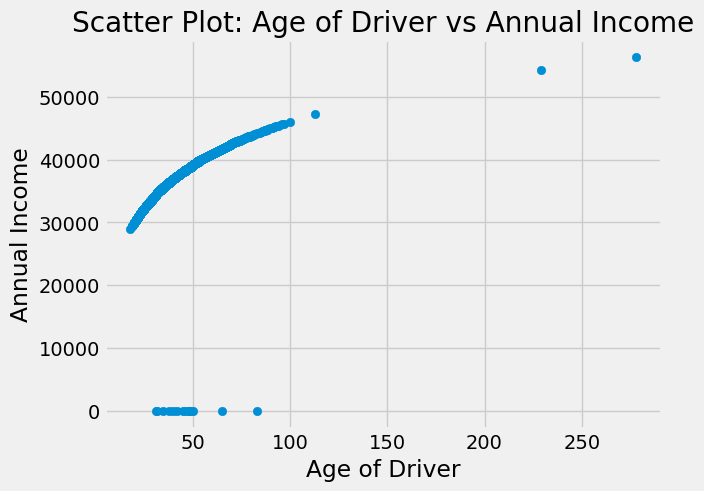

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train['age_of_driver'], X_train['annual_income'])
plt.xlabel('Age of Driver')
plt.ylabel('Annual Income')
plt.title('Scatter Plot: Age of Driver vs Annual Income')
plt.show()


### Plot 5: Distribution of Gender in Fraud Cases

From the graph we can see that Female individuals are involved in more fraud cases compared to males.


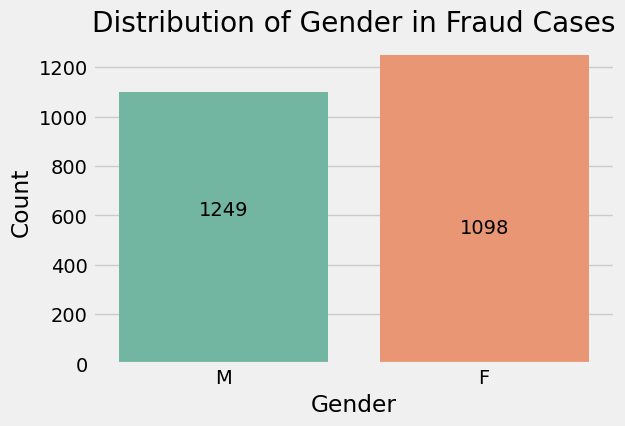

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for fraud cases
fraud_data = train_data[train_data['fraud'] == 1]

# Set the figure size
plt.figure(figsize=(6, 4))

# Generate the count plot for gender
sns.countplot(data=fraud_data, x='gender', palette='Set2')

# Get the value counts of gender
gender_counts = fraud_data['gender'].value_counts()

# Set the plot title and labels
plt.title('Distribution of Gender in Fraud Cases')
plt.xlabel('Gender')
plt.ylabel('Count')

for i, count in enumerate(gender_counts):
    if count > 0:
        plt.text(i, count/2, str(count), ha='center', va='center')

# Show the plot
plt.show()


## Tables

### Table 1: Claims by Age Group

We see that different age groups have different patterns of claims, and potentially, of fraud. It's useful to understand the distribution of claims across age groups. We see that the age group of **30-44** have the highest number of claims with a count upwards of **8,500**.

In [ ]:
df['age_group'] = pd.cut(df['age_of_driver'], bins=[18, 30, 45, 60, 75, 100], labels=['18-29', '30-44', '45-59', '60-74', '75+'])
claims_age_group = df.groupby('age_group')['claim_number'].count()
claims_age_group

age_group
18-29    2632
30-44    8564
45-59    6243
60-74    1359
75+       196
Name: claim_number, dtype: int64

### Table 2: Average estimated payout per past number of claims

This could help identify if there's a pattern in the estimated payout based on the past number of claims. If a driver who has made numerous claims in the past continues to report high payout claims, it may indicate a higher likelihood of fraud.

In [ ]:
average_payout_per_past_claims = df.groupby('past_num_of_claims')['claim_est_payout'].mean()
average_payout_per_past_claims

past_num_of_claims
0    4984.714621
1    5041.452668
2    5052.818498
3    4989.242539
4    5045.264346
5    4723.724324
6    4621.007759
Name: claim_est_payout, dtype: float64

### Table 3: Fraud rate by living status and marital status

Personal factors such as living status and marital status might influence the likelihood of committing fraud.

In [ ]:
fraud_rate_living_marital = df.groupby(['living_status', 'marital_status'])['fraud'].mean()
fraud_rate_living_marital

living_status  marital_status
Own            0.0               0.185734
               1.0               0.128501
Rent           0.0               0.213604
               1.0               0.148520
Name: fraud, dtype: float64

### Table 4: Claims and fraud rate by day of week

There may be patterns in when claims are filed and when fraud occurs. For instance, claims filed on weekends or certain weekdays might have a higher likelihood of being fraudulent.


In [ ]:
claims_fraud_day_of_week = df.groupby('claim_day_of_week').agg({'claim_number': 'count', 'fraud': 'mean'})
claims_fraud_day_of_week

,claim_number,fraud
claim_day_of_week,,
Friday,2630,0.141065
Monday,2764,0.145080
Saturday,2694,0.159614
Sunday,2703,0.166112
Thursday,2785,0.156553
Tuesday,2747,0.153258
Wednesday,2677,0.160628


###Table 5: Average liability percentage for fraudulent and non-fraudulent claims

This can help understand if fraudulent claims tend to involve higher or lower liability percentages than non-fraudulent claims.

In [ ]:
average_liability_fraud = df.groupby('fraud')['liab_prct'].mean()
average_liability_fraud

fraud
0    49.491097
1    49.161675
Name: liab_prct, dtype: float64

# Data Cleaning

**Checking Data Types**

In [ ]:
# Checking the info of the dataset
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15200 entries, 6787 to 15795
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            15200 non-null  int64  
 1   gender                   15200 non-null  object 
 2   marital_status           15196 non-null  float64
 3   safty_rating             15200 non-null  int64  
 4   annual_income            15200 non-null  int64  
 5   high_education_ind       15200 non-null  int64  
 6   address_change_ind       15200 non-null  int64  
 7   living_status            15200 non-null  object 
 8   zip_code                 15200 non-null  int64  
 9   claim_date               15200 non-null  object 
 10  claim_day_of_week        15200 non-null  object 
 11  accident_site            15200 non-null  object 
 12  past_num_of_claims       15200 non-null  int64  
 13  witness_present_ind      15087 non-null  float64
 14  liab_prct          

**Descriptive Statistics of the Data**

In [ ]:
# Perform some basic statistics
X_train.describe()

,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight
count,15200.000000,15196.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15087.000000,15200.000000,15200.000000,15182.000000,15194.000000,15200.000000,15200.000000
mean,43.577368,0.717491,73.470395,37331.196184,0.699211,0.571579,49927.536382,0.499408,0.236495,49.421842,0.599342,4994.857484,5.012242,23002.479416,23013.770794
std,12.115236,0.450234,15.472854,2996.757118,0.458616,0.494866,29213.752490,0.948853,0.424944,33.654185,0.490048,2226.412072,2.248788,12011.181530,12105.526639
min,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302
25%,35.000000,0.000000,65.000000,35550.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3368.509686,3.000000,14190.143350,14115.867805
50%,43.000000,1.000000,76.000000,37607.000000,1.000000,1.000000,50027.000000,0.000000,0.000000,50.000000,1.000000,4675.629146,5.000000,20782.731950,20783.493005
75%,51.000000,1.000000,85.000000,39317.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6259.469265,6.000000,29440.089263,29442.240695
max,278.000000,1.000000,100.000000,56275.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,127063.506000,103192.723700


**Checking for Missing values**

In [ ]:
# Checking for null values
X_train.isnull().sum()

age_of_driver                0
gender                       0
marital_status               4
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        113
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            18
age_of_vehicle               6
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
dtype: int64

## Handling Missing values and outliers

We chose to use the mode for imputing the missing values for'marital_status' and 'witness_present_ind' because they are categorical variables while we used the median for the numerical features 'claim_est_payout' and 'age_of_vehicle'.

Similarly after plotting boxplots and examining outliers of the variables,we have foudn age_of_Driver,annual_income,zip_code has outliers.Handled those outliers as below

In [ ]:
import numpy as np

# Assuming X_train and X_test are the training and testing sets, respectively
X_train.loc[X_train['age_of_driver'] > 100, 'age_of_driver'] = np.nan
X_train.loc[X_train['annual_income'] == -1, 'annual_income'] = np.nan
X_train.loc[X_train['zip_code'] == 0, 'zip_code'] = np.nan

# Calculate mode and median values from the training set
marital_status_mode = X_train['marital_status'].mode()[0]
witness_present_ind_mode = X_train['witness_present_ind'].mode()[0]
claim_est_payout_median = X_train['claim_est_payout'].median()
age_of_vehicle_median = X_train['age_of_vehicle'].median()
annual_income_median = X_train['annual_income'].median()
zip_code_mode = X_train['zip_code'].median()
age_of_driver_median = X_train['age_of_driver'].median()

# Fill missing values in the training set
X_train['marital_status'].fillna(marital_status_mode, inplace=True)
X_train['witness_present_ind'].fillna(witness_present_ind_mode, inplace=True)
X_train['claim_est_payout'].fillna(claim_est_payout_median, inplace=True)
X_train['age_of_vehicle'].fillna(age_of_vehicle_median, inplace=True)
X_train['annual_income'].fillna(annual_income_median, inplace=True)
X_train['zip_code'].fillna(zip_code_mode, inplace=True)
X_train['age_of_driver'].fillna(age_of_driver_median, inplace=True)

X_test.loc[X_test['age_of_driver'] > 100, 'age_of_driver'] = np.nan
X_test.loc[X_test['annual_income'] == -1, 'annual_income'] = np.nan
X_test.loc[X_test['zip_code'] == 0, 'zip_code'] = np.nan

# Fill missing values in the testing set with the calculated values from the training set
X_test['marital_status'].fillna(marital_status_mode, inplace=True)
X_test['witness_present_ind'].fillna(witness_present_ind_mode, inplace=True)
X_test['claim_est_payout'].fillna(claim_est_payout_median, inplace=True)
X_test['age_of_vehicle'].fillna(age_of_vehicle_median, inplace=True)
X_test['annual_income'].fillna(annual_income_median, inplace=True)
X_test['zip_code'].fillna(zip_code_mode, inplace=True)
X_test['age_of_driver'].fillna(age_of_driver_median, inplace=True)

**Recoding Gender and Living_Status columns to binary values**

In [ ]:
X_train['gender'] = X_train['gender'].replace({'M': 0, 'F': 1})
X_test['gender'] = X_test['gender'].replace({'M': 0, 'F': 1})

X_train['living_status'] = X_train['living_status'].replace({'Own': 0, 'Rent': 1})
X_test['living_status'] = X_test['living_status'].replace({'Own': 0, 'Rent': 1})

**Checking for Missing values after imputing**

In [ ]:
X_train.isnull().sum()

age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
dtype: int64

## Feature Engineering

Since claim_date is a categorical variable we changed it to a datetime variable to create more features. We extracted the year, month and date and dropped the claim date from both the train and test sets. We also decided to drop the vehicle_color and vehicle_weight.

In [ ]:
#Since claim_date is a categorical variable we will change it to a datetime variable to create more features
X_train['claim_date'] = pd.to_datetime(X_train['claim_date'])

# Extracting the year, month,and day
X_train['claim_year'] = X_train['claim_date'].dt.year
X_train['claim_month'] = X_train['claim_date'].dt.month
X_train['claim_day'] = X_train['claim_date'].dt.day

# Drop the original claim_date
X_train = X_train.drop(columns=['claim_date'])

# Same steps for the test set
X_test['claim_date'] = pd.to_datetime(X_test['claim_date'])
X_test['claim_year'] = X_test['claim_date'].dt.year
X_test['claim_month'] = X_test['claim_date'].dt.month
X_test['claim_day'] = X_test['claim_date'].dt.day
X_test = X_test.drop(columns=['claim_date'])

columns_to_drop = ['vehicle_color', 'vehicle_weight']  # List of column names to drop
X_train.drop(columns=columns_to_drop, inplace=True)
print(X_train)
#print(X_train.columns)

X_test.drop(columns=columns_to_drop, inplace=True)
print(X_test)

       age_of_driver  gender  marital_status  safty_rating  annual_income  \
6787            46.0       1             1.0            50        38294.0   
6097            35.0       0             1.0            77        35552.0   
11219           63.0       0             1.0            86        41432.0   
2512            47.0       0             1.0            81        38502.0   
4279            37.0       0             1.0            82        36102.0   
...              ...     ...             ...           ...            ...   
11284           55.0       1             0.0            93        40075.0   
11964           22.0       1             1.0            77        30907.0   
5390            40.0       1             1.0            79        36874.0   
860             57.0       1             0.0            80        40453.0   
15795           56.0       0             1.0            81        40249.0   

       high_education_ind  address_change_ind  living_status  zip_code  \
6

## One-hot encoding

I this section we identified the categorical variable, created a OneHotEncoder instance. We then fitted and transformed the training and the test data using the encoder. We created the column names of the transformed features. Finally created a new dataframe with the transformed features.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# # Identify categorical variables
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# # Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# # Fit and transform the training data using the encoder
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])

# # Transform the test data using the fitted encoder
X_test_encoded = encoder.transform(X_test[categorical_columns])

# # Create column names for the transformed features
column_names = encoder.get_feature_names_out(categorical_columns)

# # Create new DataFrames with the transformed features
X_train_encoded = pd.DataFrame(X_train_encoded, columns=column_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=column_names, index=X_test.index)

We created a standard scalar instance. Fitted and transformed the training and test data using scalar. Finally created a new dataframe using the scaled numerical features.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()
numerical_columns = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
# Fit and transform the training data using the scaler
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test[numerical_columns])

# Create new DataFrames with the scaled numerical features
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_columns, index=X_test.index)


In [ ]:
# Concatenate the encoded categorical features and scaled numerical features
X_train_processed = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test_processed = pd.concat([X_test_encoded, X_test_scaled], axis=1)


In [ ]:
print(X_train_processed.shape)

(15200, 35)


In [ ]:
X_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15200 entries, 6787 to 15795
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   claim_day_of_week_Friday     15200 non-null  float64
 1   claim_day_of_week_Monday     15200 non-null  float64
 2   claim_day_of_week_Saturday   15200 non-null  float64
 3   claim_day_of_week_Sunday     15200 non-null  float64
 4   claim_day_of_week_Thursday   15200 non-null  float64
 5   claim_day_of_week_Tuesday    15200 non-null  float64
 6   claim_day_of_week_Wednesday  15200 non-null  float64
 7   accident_site_Highway        15200 non-null  float64
 8   accident_site_Local          15200 non-null  float64
 9   accident_site_Parking Lot    15200 non-null  float64
 10  channel_Broker               15200 non-null  float64
 11  channel_Online               15200 non-null  float64
 12  channel_Phone                15200 non-null  float64
 13  vehicle_categ

In [ ]:
X_train_processed.dtypes

claim_day_of_week_Friday       float64
claim_day_of_week_Monday       float64
claim_day_of_week_Saturday     float64
claim_day_of_week_Sunday       float64
claim_day_of_week_Thursday     float64
claim_day_of_week_Tuesday      float64
claim_day_of_week_Wednesday    float64
accident_site_Highway          float64
accident_site_Local            float64
accident_site_Parking Lot      float64
channel_Broker                 float64
channel_Online                 float64
channel_Phone                  float64
vehicle_category_Compact       float64
vehicle_category_Large         float64
vehicle_category_Medium        float64
age_of_driver                  float64
gender                         float64
marital_status                 float64
safty_rating                   float64
annual_income                  float64
high_education_ind             float64
address_change_ind             float64
living_status                  float64
zip_code                       float64
past_num_of_claims       

## Data Balancing using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Before SMOTE
print('Before SMOTE:')
print(y_train.value_counts())

# Define SMOTE instance
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

# After SMOTE
print('\nAfter SMOTE:')
print(y_train_smote.value_counts())

Before SMOTE:
0    12853
1     2347
Name: fraud, dtype: int64

After SMOTE:
0    12853
1    12853
Name: fraud, dtype: int64


In [ ]:
print(X_test_processed.shape)

(3800, 35)


# Modelling

## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

# Create and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=6,
                                           min_samples_split=4, min_samples_leaf=9, subsample=1.0)
gb_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = gb_classifier.predict(X_test_processed)
train_pred = gb_classifier.predict(X_train_smote)


print("Training Accuracy: ", gb_classifier.score(X_train_smote, y_train_smote))
print('Testing Accuarcy: ', gb_classifier.score(X_test_processed, y_test))


# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# classification report
print("Confusion Matrix of Train data : ")
cm2 = confusion_matrix(y_train_smote, train_pred)
print(cm2)

print("Classification Report of Train data : ")
cr2 = classification_report(y_train_smote, train_pred)
print(cr2)


# confusion matrix
print("Confusion Matrix of Test data")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Classification Report of test data : ")
cr = classification_report(y_test, y_pred)
print(cr)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print((tn, fp, fn, tp))



Training Accuracy:  0.921030109702015
Testing Accuarcy:  0.8410526315789474
0.8410526315789474
Confusion Matrix of Train data : 
[[12822    31]
 [ 1999 10854]]
Classification Report of Train data : 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     12853
           1       1.00      0.84      0.91     12853

    accuracy                           0.92     25706
   macro avg       0.93      0.92      0.92     25706
weighted avg       0.93      0.92      0.92     25706

Confusion Matrix of Test data
[[3165   44]
 [ 560   31]]
Classification Report of test data : 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3209
           1       0.41      0.05      0.09       591

    accuracy                           0.84      3800
   macro avg       0.63      0.52      0.50      3800
weighted avg       0.78      0.84      0.79      3800

(3165, 44, 560, 31)


Shape of the Test Partition fter running Model

In [ ]:
print(X_test_processed.shape)

(3800, 35)


# Interpretability

## Permutation Testing

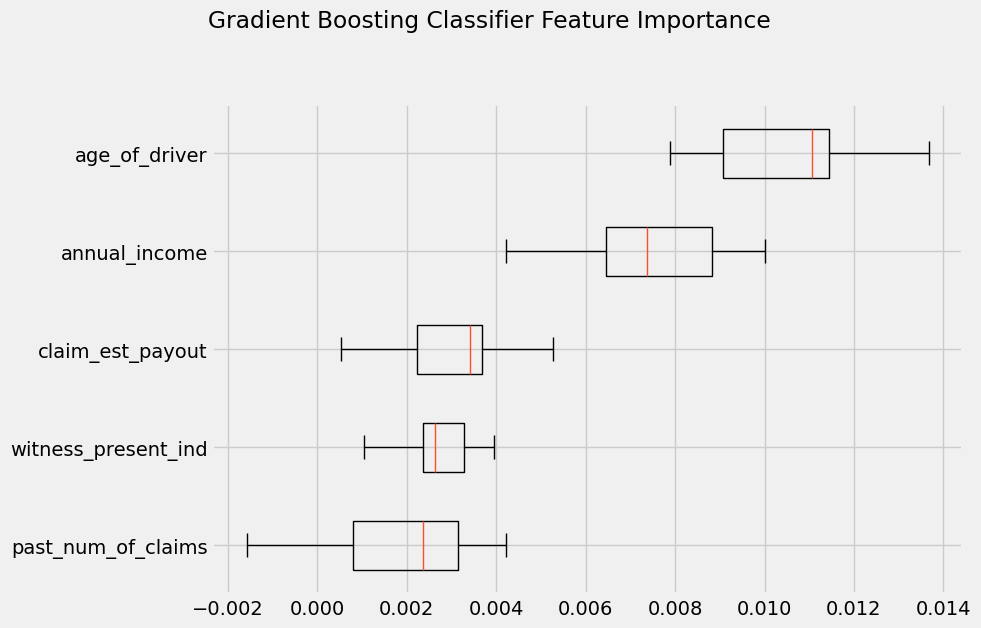

Top 5 Features based on Permutation Importance:
1. past_num_of_claims
2. witness_present_ind
3. claim_est_payout
4. annual_income
5. age_of_driver


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay

# The model here is gb_classifier
model = gb_classifier

# Store permutation importance
result = permutation_importance(model, X_test_processed, y_test, n_repeats=15, random_state=13)
perm_sorted_idx = result.importances_mean.argsort()[::-1][:5]

tree_importance_sorted_idx = np.argsort(model.feature_importances_)
tree_indices = np.arange(0, len(model.feature_importances_)) + 0.5

# Boxplots
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
ax1.boxplot(result.importances[perm_sorted_idx[::-1]].T, vert=False, labels=X_test_processed.columns[perm_sorted_idx][::-1])
fig.suptitle('Gradient Boosting Classifier Feature Importance', y=1.05)
fig.tight_layout()
plt.show()

# Print the top 5 features
top_5_features = X_test_processed.columns[perm_sorted_idx][-5:][::-1]
print('Top 5 Features based on Permutation Importance:')
for i, feature in enumerate(top_5_features):
    print(f"{i+1}. {feature}")

## Partial Dependence

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 29.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3624 sha256=6ff5bf857d4a020e3cc4225ffc4ea17cfce14d4dc0055a571a1b6b360d87dca7
  Stored in directory: /root/.cache/pip/wheels/af/57/4b/0d7bdd5b5ee35d225b01da15c62ed0ec0af10073f24a4a03ce
Successfully built pycebox


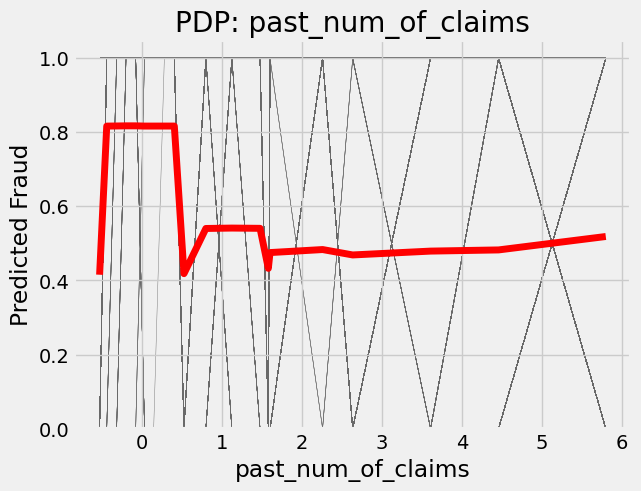

In [ ]:
tmpdf = ice(data=X_train_smote, column='past_num_of_claims',
                   predict=gb_classifier.predict,
            num_grid_points=100)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.ylim(0, plt.ylim()[1])
plt.title('PDP: past_num_of_claims')
plt.ylabel('Predicted Fraud')
plt.xlabel('past_num_of_claims');
plt.show()

The spike at the beginning suggests that the probability of fraud increases sharply as 'past_num_of_claims' increases from 0 to 0.5. This might indicate that individuals with a low number of past claims who suddenly file a claim are more likely to be fraudulent, according to the model.

The fact that it stabilizes after suggests that beyond a certain number of past claims, increasing the number of past claims does not significantly change the probability of fraud. The model sees a similar risk level for all individuals beyond this point, regardless of how many past claims they have.

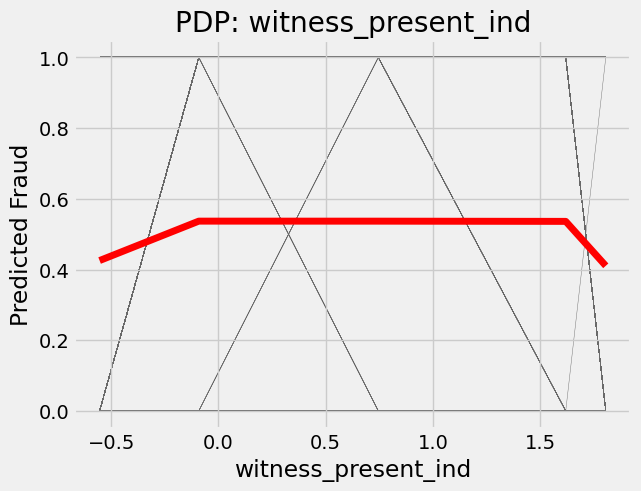

In [ ]:
tmpdf = ice(data=X_train_smote, column='witness_present_ind',
                   predict=gb_classifier.predict,
            num_grid_points=100)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: witness_present_ind')
plt.ylabel('Predicted Fraud')
plt.xlabel('witness_present_ind');
plt.show()

This PDP is mostly stable around the middle but the edges seem to decrease slightly, this suggests that variations in 'witness_present_ind' have a relatively constant effect on the predicted probability of fraud. In other words, the presence or absence of a witness doesn't significantly change the model's prediction of fraud.

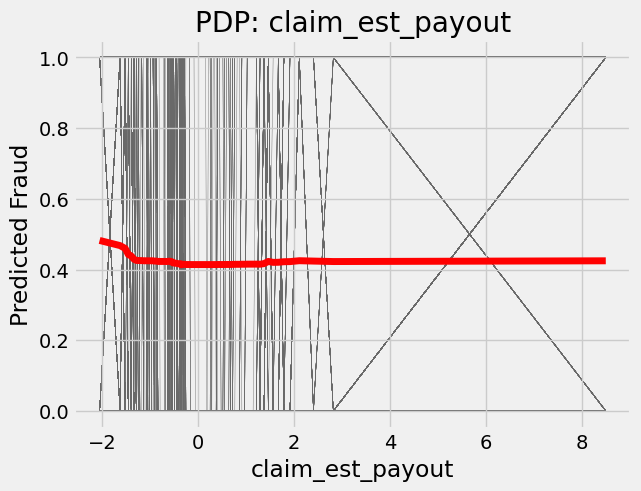

In [ ]:
tmpdf = ice(data=X_train_smote, column='claim_est_payout',
                   predict=gb_classifier.predict,
            num_grid_points=100)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: claim_est_payout')
plt.ylabel('Predicted Fraud')
plt.xlabel('claim_est_payout');
plt.show()

Since this PDP is a bit higher in the beginning and then stabilizes, it suggests that lower values of 'claim_est_payout' might be associated with a slightly higher predicted probability of fraud according to the model. After a certain threshold, increasing 'claim_est_payout' doesn't significantly change the model's prediction of fraud. This means the model has learned that the estimated payout of a claim doesn't necessarily make a claim more or less likely to be fraudulent after a certain amount.

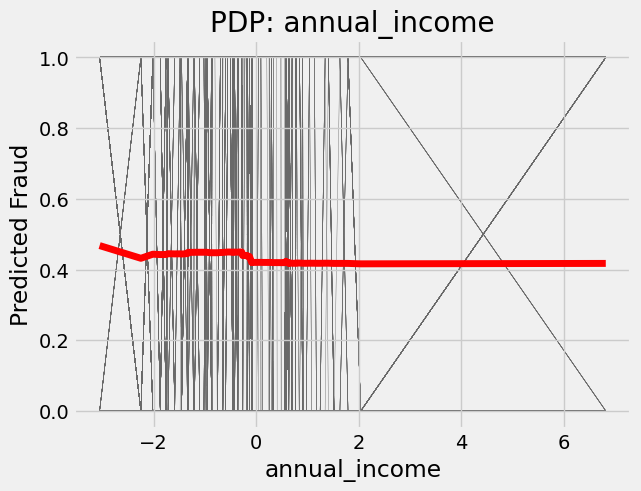

In [ ]:
tmpdf = ice(data=X_train_smote, column='annual_income',
                   predict=gb_classifier.predict,
            num_grid_points=100)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: annual_income')
plt.ylabel('Predicted Fraud')
plt.xlabel('annual_income');
plt.show()

 Since this PDP is stable around the middle, it indicates that the predicted probability of fraud doesn't change much with variations in the 'annual_income' according to the model.

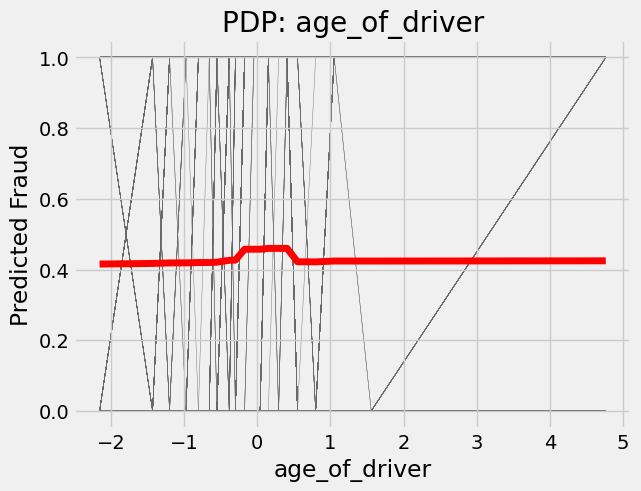

In [ ]:
tmpdf = ice(data=X_train_smote, column='age_of_driver',
                   predict=gb_classifier.predict,
            num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: age_of_driver')
plt.ylabel('Predicted Fraud')
plt.xlabel('age_of_driver');
plt.show()

 Since this PDP is stable around the middle, it indicates that the predicted probability of fraud doesn't change much with variations in the 'age_of_driver' according to the model.

# Conclusion


1.   We utilized the mode to imput missing values for'marital_status' and 'witness_present_ind' because they are categorical variables, while the median was used for the numerical features 'claim_est_payout' and 'age_of_vehicle'.

2. Similarly, we discovered outliers in age_of_driver,annual_income, and zip_code after producing boxplots and Handled the outliers by imputing with mean.

3. After trying models such as Random Forest Classifier and Gradient Boosting Classifier we found that Gradient Boosting Classifier performed betterwith an accuracy of 84%.Upon checking Confusion Matrix  for GBC ,It has given good values compared to RFC.
4.Based on these results, our primary recommendation would be to focus more on policyholders who have a low number of past claims and who file large claims. These claims should undergo detailed review and investigation before they are approved to reduce the risk of fraudulent payouts.

5. SMOTE generates new samples that maintain some properties of the original samples, as opposed to simple oversampling approaches that copy existing samples. This can aid in the preservation of crucial information and patterns in the minority class, resulting in improved classification performance.

